In [41]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
z_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [42]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [43]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 10

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [44]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [45]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(178.5591, grad_fn=<MseLossBackward>)
epoch 0, loss 178.55909729003906
tensor(14.7729, grad_fn=<MseLossBackward>)
epoch 1, loss 14.772902488708496
tensor(1.4111, grad_fn=<MseLossBackward>)
epoch 2, loss 1.4110512733459473
tensor(0.3189, grad_fn=<MseLossBackward>)
epoch 3, loss 0.3188658058643341
tensor(0.2275, grad_fn=<MseLossBackward>)
epoch 4, loss 0.2275046855211258
tensor(0.2178, grad_fn=<MseLossBackward>)
epoch 5, loss 0.21780246496200562
tensor(0.2148, grad_fn=<MseLossBackward>)
epoch 6, loss 0.21478599309921265
tensor(0.2123, grad_fn=<MseLossBackward>)
epoch 7, loss 0.21234001219272614
tensor(0.2100, grad_fn=<MseLossBackward>)
epoch 8, loss 0.20996500551700592
tensor(0.2076, grad_fn=<MseLossBackward>)
epoch 9, loss 0.20761992037296295


[[ 0.15239139]
 [ 2.2744465 ]
 [ 4.3965015 ]
 [ 6.5185566 ]
 [ 8.640612  ]
 [10.762667  ]
 [12.884722  ]
 [15.006777  ]
 [17.128832  ]
 [19.250887  ]
 [21.372942  ]]


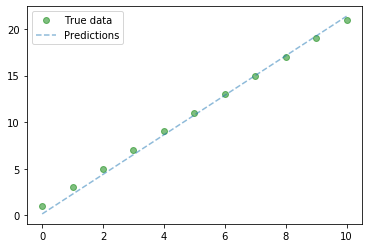

In [46]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

import matplotlib.pyplot as plt
    
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

In [54]:
new_var = Variable(torch.Tensor([[15.0]]))
model(new_var)

tensor([[31.9832]], grad_fn=<AddmmBackward>)